# Visualización con `{ggplot}`

<div class="alert alert-block alert-info"> <b>NOTA:</b> Este tutorial asume un conocimiento básico de R. </div>

Hadley Wickham define la gramática de gráficos así:

"A grammar of graphics is a tool that enables us to concisely describe the components of a graphic. Such a grammar allows us to move beyond named graphics (e.g., the 'scatterplot') and gain insight into the deep structure that underlies statistical graphics." [Hadley Wickham, 2010.](https://vita.had.co.nz/papers/layered-grammar.html).

Básicamente, la idea detrás de `ggplot2` es un conjunto de reglas o principios para construir gráficos en forma de capas, en donde cada capa agrega un elemento al gráfico. Por ejemplo, en la siguiente figura se representan los elementos que conforman a un gráfico de dispersión (scatterplot): los datos, representados por los puntos (geom points), la escala y el sistema de coordenadas (ejes, etiquetas de los ejes y las marcas o ticks) y las anotaciones (como título y leyendas de los puntos). 

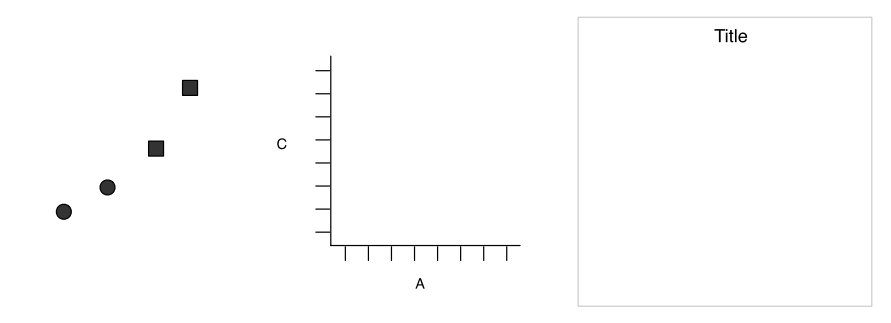

Elementos de un gráfico: objetos geométricos, sistema de coordenadas y anotaciones.

In [54]:
library(IRdisplay)
dir_name <- paste0(getwd(), "/img/layers_ggplot.png")
display_png(file = dir_name, width = 480)
display_text('Elementos de un gráfico: objetos geométricos, sistema de coordenadas y anotaciones.')

Juntando todos los elementos, tenemos algo como lo siguiente

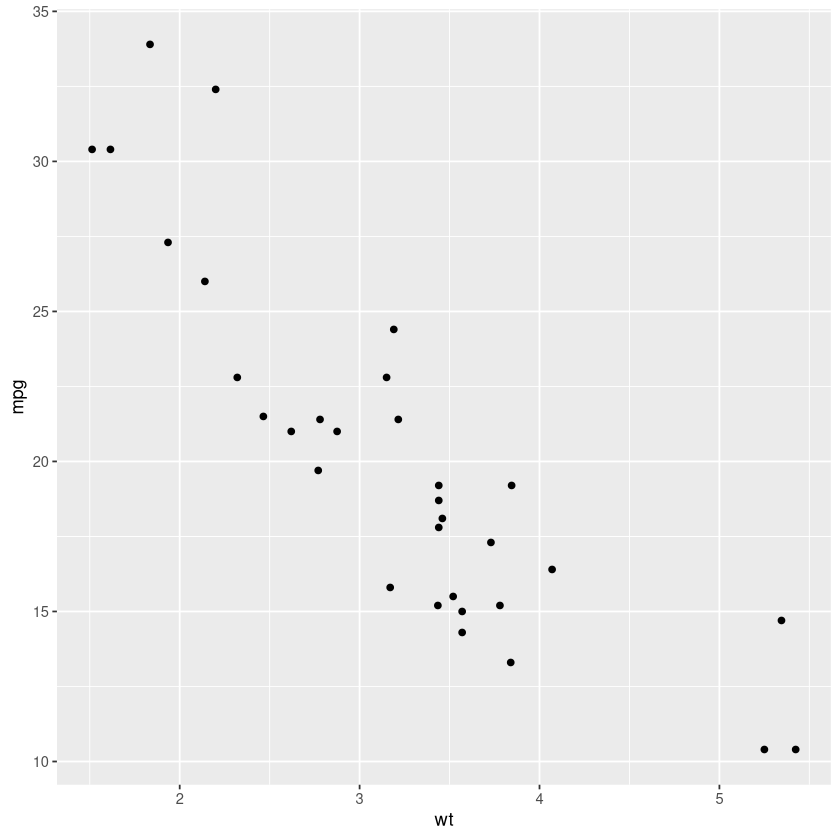

In [39]:
library(tidyverse) # carga ggplot2, para solo ggplot2 usar library(ggplot2)
# graficar el las millas por galón como función del peso de coche
ggplot(
  # data
  data = mtcars,
  mapping = aes(x = wt, y = mpg)
) +
  geom_point()

Los argumentos de `ggplot` son

1. `data` define la fuente de información, de cuyas columnas se tomarán las variables que se *mapearán*.
2. `mapping` define cómo las variables son aplicadas al gráfico, en forma de *aesthetics* (`aes`) especificando las variables. En el anterior gráfico de dispersión, `wt` es mapeado al eje `x`, `mpg` al eje `y`, y ambas variables se toman de `mtcars`.

La última capa, `geom_point()` especifica qué objeto geométrico (puntos) se usará para representar cada par de valores ordenados $(x, y)$. Dependiendo de las necesidades y el tipo de datos se podrá cambiar esta capa. Por ejemplo, si $x$ es una variable categórica, un objeto geométrico más apropiado sería el gráfico de caja y bigotes, `geom_boxplot()`

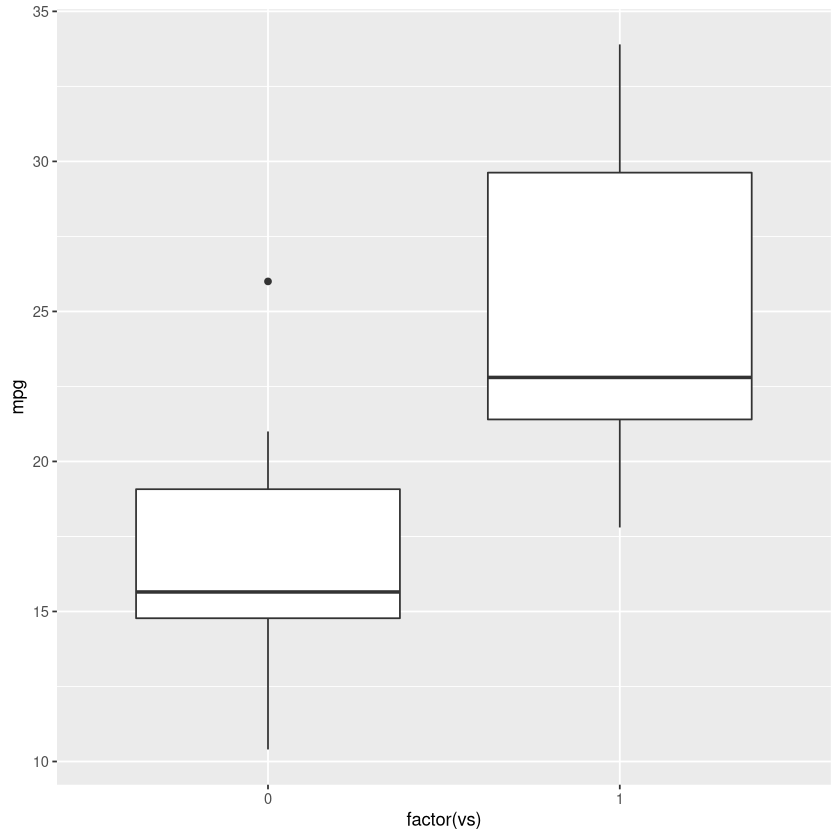

In [40]:
ggplot(
  # data
  data = mtcars,
  mapping = aes(x = factor(vs), y = mpg)
) +
  geom_boxplot()

Notar que se usó `factor(vs)` (donde `vs` indica si el motor es en V o en línea). Esto es porque en el conjunto original, `vs` se codificó con 0 si es tipo V o 1 si es en línea. `geom_boxplot()` espera que `x` sea o caracter o factor, pero no un valor numérico. Si se deja como valor numérico, grafica solo una caja y lanza un `warning` diciendo que `x` es continuo. Una alternativa a declarar el factor es usar un tercer argumento en `aes()`, `aes(x = vs, y = mpg, group = vs)`, donde `group = vs` indica que los datos deben agruparse por `vs`.

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


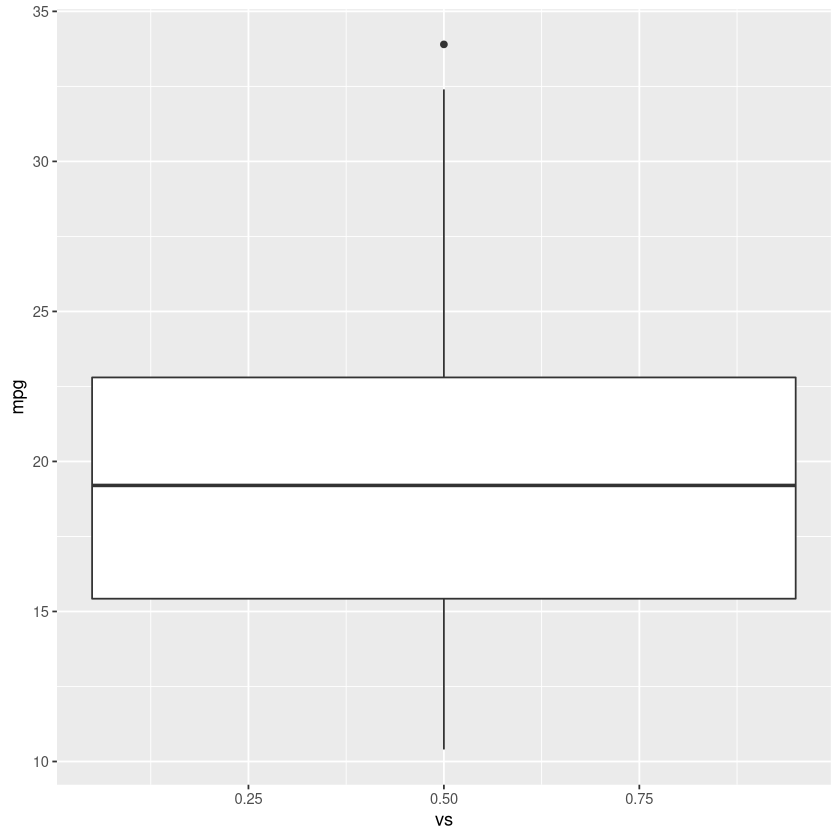

In [41]:
ggplot(
  data = mtcars,
  mapping = aes(x = vs, y = mpg)
) +
  geom_boxplot()

En `aes` se pueden especificar más argumentos si son variables. Por ejemplo, si queremos que los puntos tengan diferentes colores según una variable en una tercera columna de `data` podemos asignar esa variable al argumento `color`: 

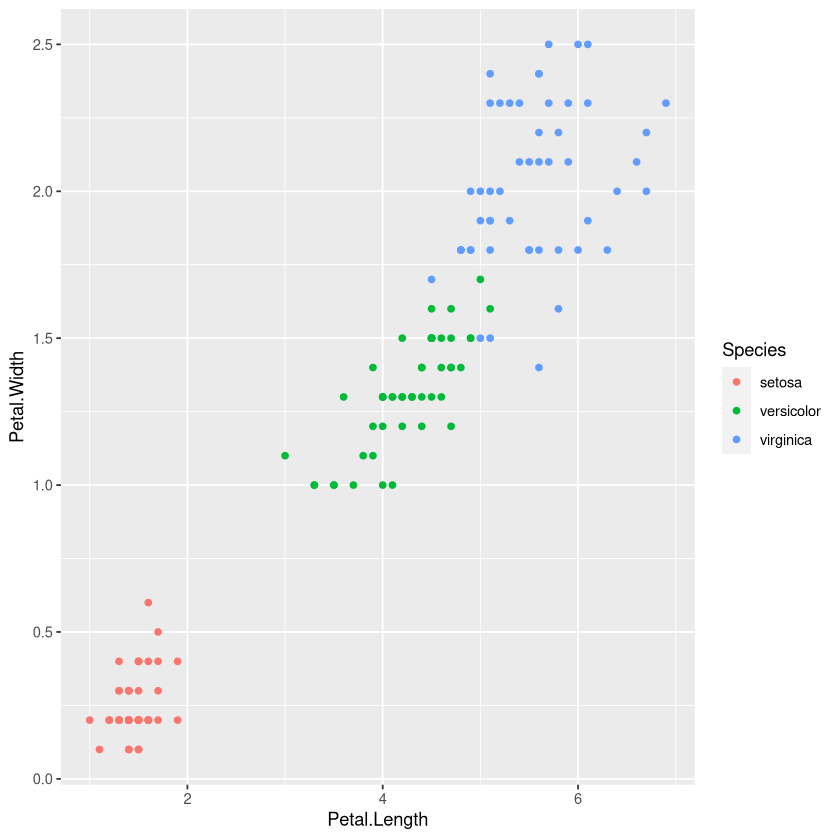

In [42]:
ggplot(
  iris,
  aes(x = Petal.Length, y = Petal.Width, color = Species)
) +
  geom_point()

Notar que ahora, dado que el objeto geométrico no es uniforme (varía una característica: el color), se agrega una leyenda para la característica que cambia. Visualizar así los datos resalta características que quizá de otra forma no serían tan evidentes. Por ejemplo, aquí es evidente que los datos se agrupan en tres clústers, uno por cada especie. Esto a su vez puede sugerir qué tipo de análisis debe llevarse a cabo (e.g., kmeans o mezclas gaussianas).

## Gráficos básicos: dispersión, caja y bigotes e histogramas

Una guía básica de gráficos según el tipo de datos que se tienen se encuentra en el siguiente link: [R Gallery](https://www.data-to-viz.com/). En esta página muestran cómo usar `ggplot` para construir los diferentes gráficos de forma sencilla.

Por ejemplo, para una y dos variables numéricas se recomiendan los siguientes gráficos

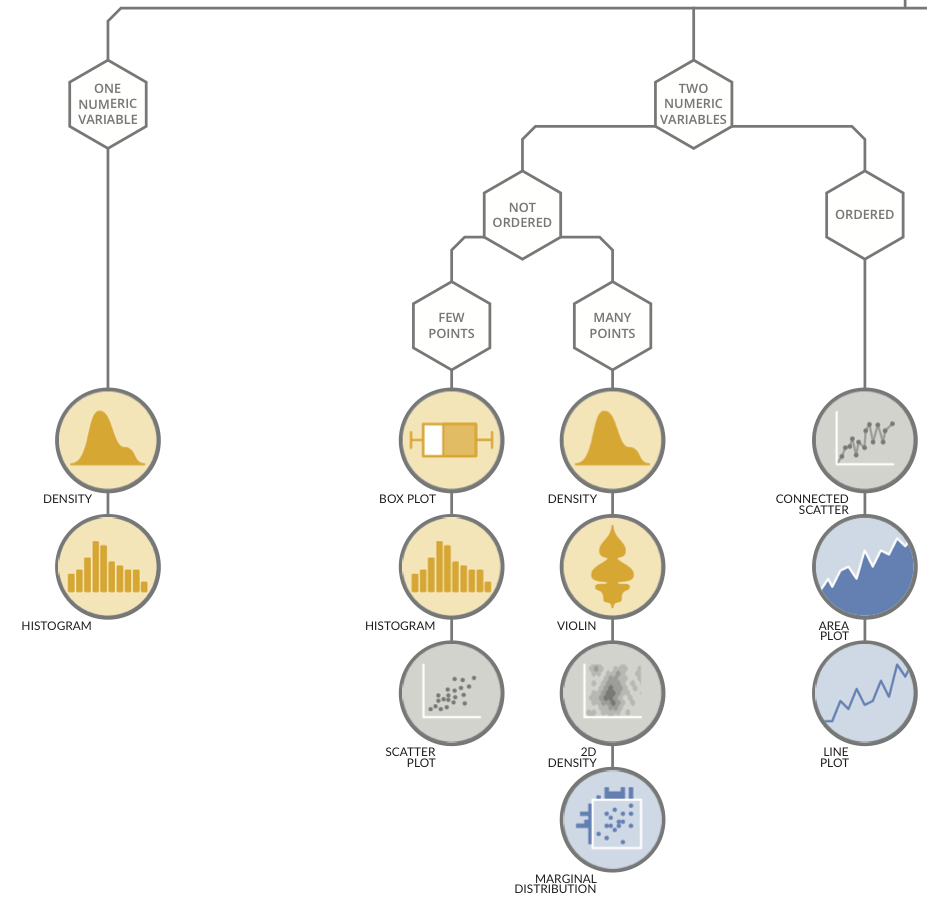

Tipos de gráficos para diferentes variables numéricas. Tomado de R Gallery.

In [55]:
dir_name <- paste0(getwd(), "/img/plot_data_type.png")
display_png(file = dir_name, width = 480)
display_text("Tipos de gráficos para diferentes variables numéricas. Tomado de R Gallery.")

Para ilustrar los diferentes tipos de gráficos, realizaré algunas simulaciones usando las funciones de variables aleatorias de `R`, como `rnorm, rexp, runif` etc., (respectivamente, para variables aleatorias normales, exponenciales y uniformes).

### Gráfico de dispersión

Para la siguiente simulación usaré el modelo lineal

$$
y = \beta_0 + \beta_1  x + \varepsilon
$$

En donde el ruido $ \varepsilon$ tiene una distribución normal con media en 0 y desviación estándar de 12:

$$
 \varepsilon \sim \text{normal}(\mu = 0, \sigma = 12)
$$


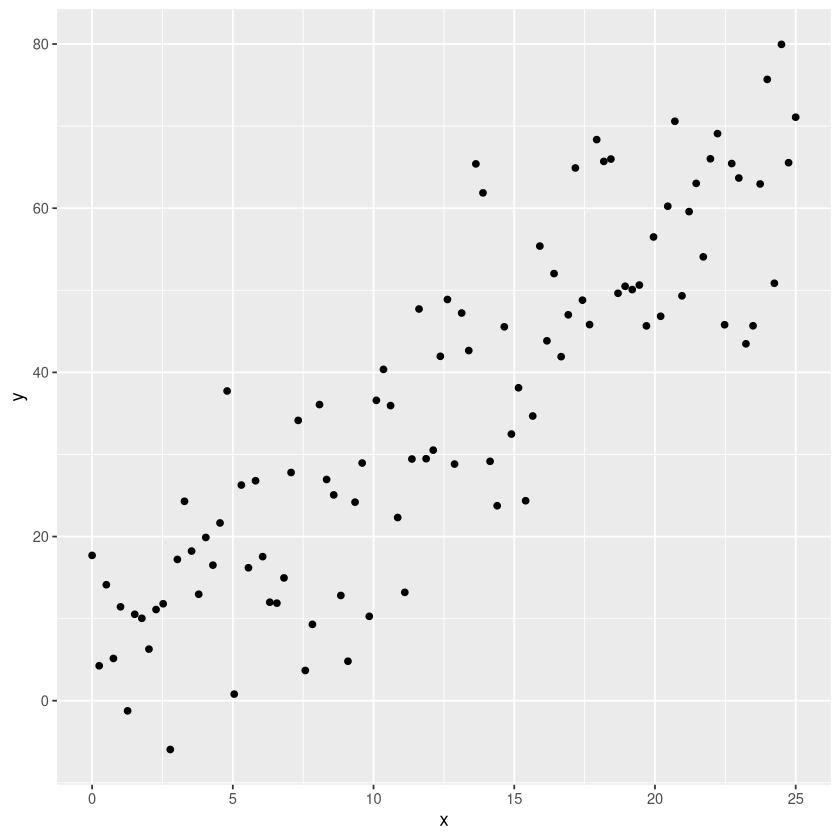

In [44]:
x <- seq(0, 25, len = 100) # 100 valores entre 0 y 25
epsilon <- rnorm(100, 0, 12)
b0 <- 5
b1 <- 2.5
y <- b0 + b1 * x + epsilon
df_xy <- data.frame(x = x, y = y)

ggplot(
  df_xy,
  aes(x = x, y = y)
) +
  geom_point()

Podemos correr una regresión lineal y agregar como tercera columna los residuos. Como extra, instalamos `ggExtra` para colocar un histograma marginal en `y` para enfatizar la distribución de los residuos alrededor del 0.

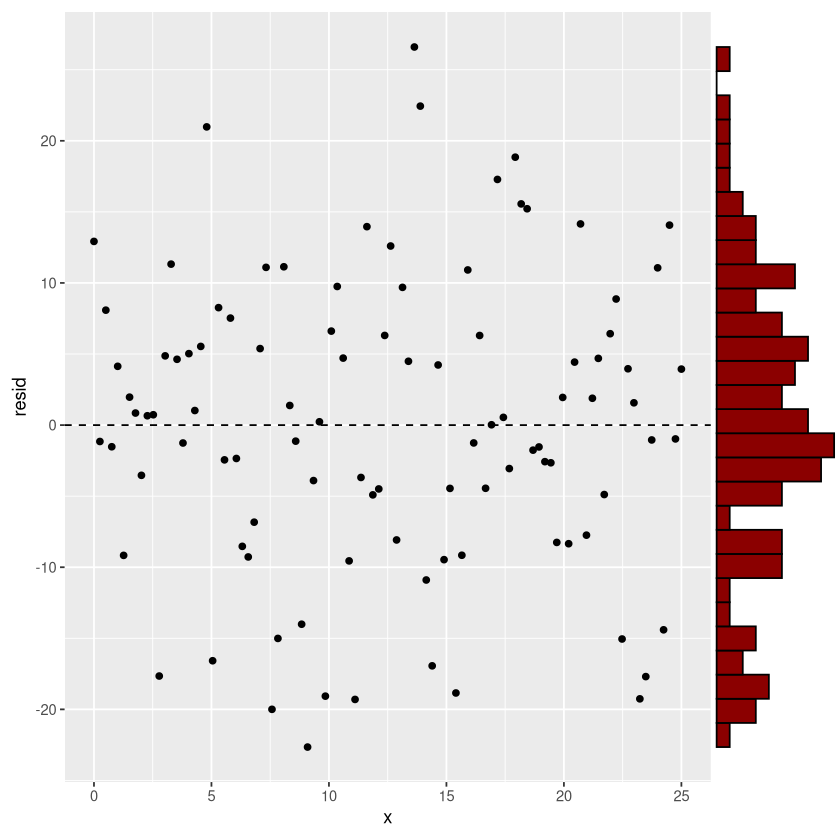

In [45]:
# install.packages("ggExtra")
library(ggExtra)
lm1 <- lm(y ~ x, data = df_xy)
df_xy$resid <- resid(lm1)
p <- ggplot(
  df_xy,
  aes(x = x, y = resid)
) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = 2)

# histograma marginal vertical
ggMarginal(
  # gráfico original
  p,
  # especificar el tipo; otras opciones son density, boxplot, violin y densigram
  type = "histogram",
  # en eje y
  margins = "y",
  # rellenar de rojo
  fill = 'red4'
)

### Histogramas

Los histogramas son gráficos de barras donde la amplitud de la barra corresponde a un rango de valores en los que se divide el vector de valores $x$, y la altura corresponde a la cantidad (o frecuencia) de valores en $x$ que caen en un rango dado. Si la frecuencia se divide entre el total, se tiene una frecuencia relativa (o probabilidad). Si la frecuencia se divide entre el total multiplicado por el rango del histograma, se obtiene densidad de probabilidad. Por ejemplo, si $x$ se divide en rangos de 0.5, la densidad sería

$$
p(x) = \frac{freq}{N\times 0.5}
$$

o en general

$$
p(x) = \frac{freq}{N\times \Delta x}
$$

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



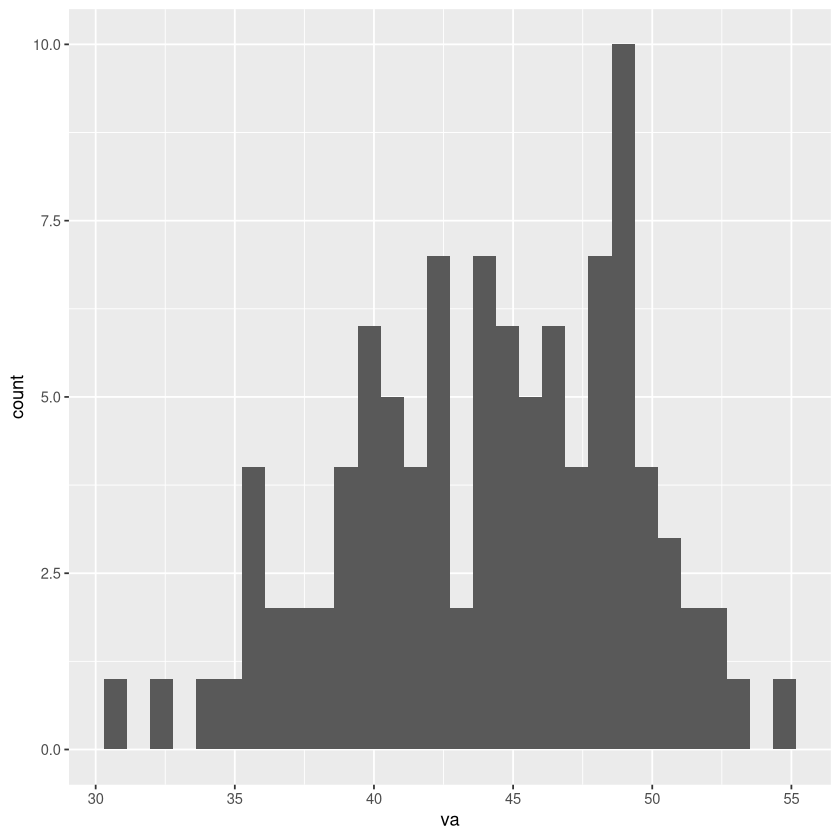

In [46]:
# data
datos <- data.frame(va = rnorm(n = 100, mean = 45, sd = 5))

# histograma
p <- ggplot(
  datos,
  aes(x = va)
) +
  geom_histogram()
p

Si tenemos una variable numérica pero dos grupos, podemos intentar ver si existen diferencias agrupando por color. Dato que los histogramas son barras, debemos especificar tanto el color del borde como el del relleno.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



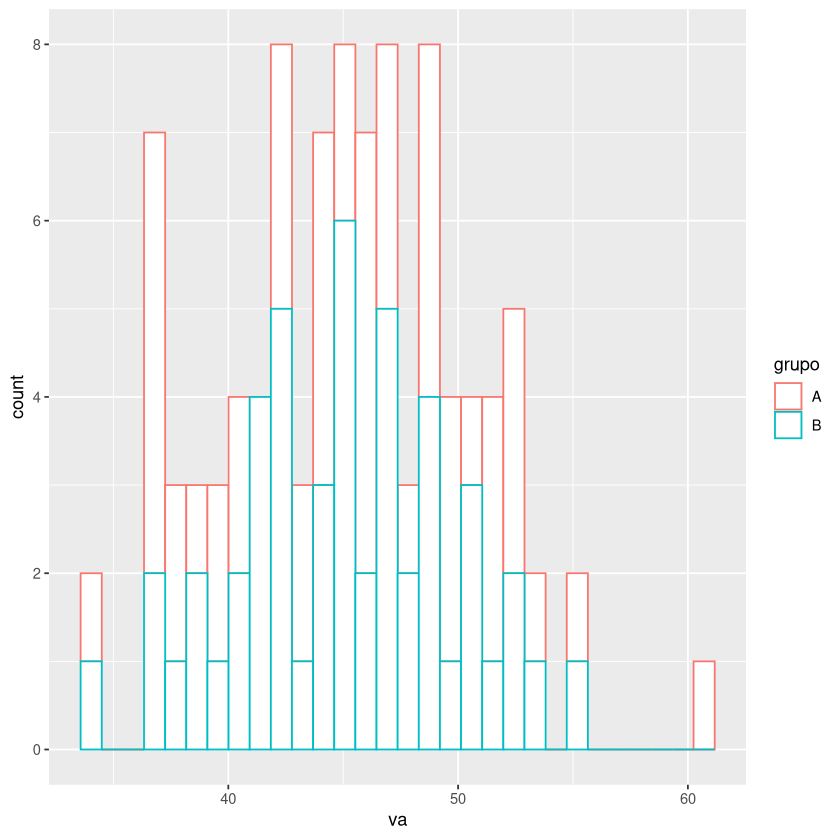

In [47]:
# data
datos <- data.frame(
  va = rnorm(n = 100, mean = 45, sd = 5),
  # creamos una variable grupo que toma A 50 veces y B 50 veces
  grupo = c(
    rep("A", 50), rep("B", 50)
  )
)

# histograma
p <- ggplot(
  datos,
  # color según el grupo
  aes(x = va, color = grupo)
) +
  # relleno blanco
 geom_histogram(fill = 'white')
p

En este gráfico es más o menos claro que no hay diferencias entre ambos grupos. Hagamos otro ejemplo donde, por diseño (simulación) ambos grupos provengan de distribuciones diferentes.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



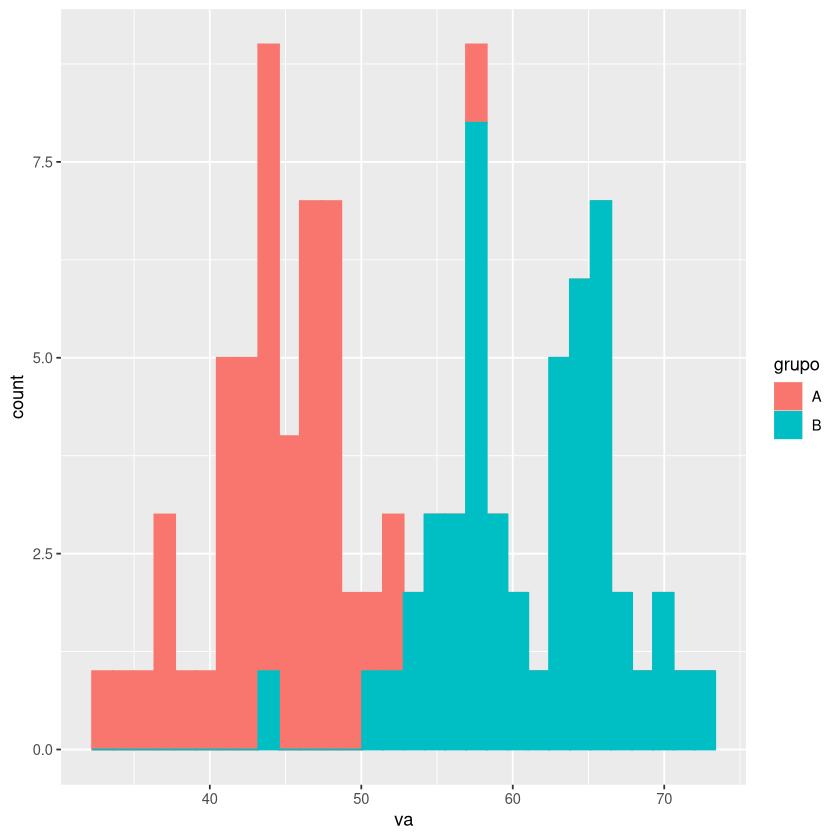

In [48]:
# data
datos <- data.frame(
  va = c(
    # 50 valores con media de 45
    rnorm(n = 50, mean = 45, sd = 5),
    # 50 valores con media de 60
    rnorm(n = 50, mean = 60, sd = 5)
  ),
  # creamos una variable grupo que toma A 50 veces y B 50 veces
  grupo = c(
    rep("A", 50), rep("B", 50)
  )
)

# histograma
p <- ggplot(
  datos,
  # color Y relleno según el grupo
  aes(x = va, color = grupo, fill = grupo)
) +
  # relleno blanco
 geom_histogram()
p

Otra forma legítima de visualizar una variable continua (`va`) como perteneciente a dos grupos es usando un gráfico de caja y bigotes.

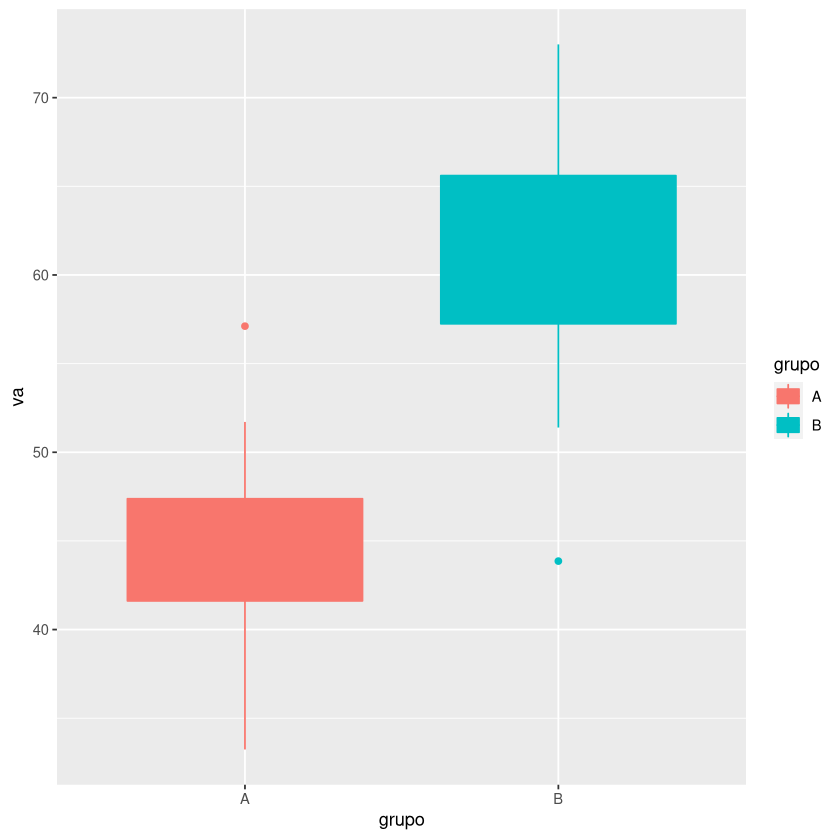

In [49]:
# histograma
p <- ggplot(
  datos,
  # color Y relleno según el grupo
  aes(
    x = grupo,
    y = va,
    color = grupo, fill = grupo
  )
) +
  # relleno blanco
 geom_boxplot()
p

O, incluso mejor en algunos casos, un gráfico de violín, que básicamente es un gráfico de densidad, pero muestra más información que el gráfico de caja y bigotes.

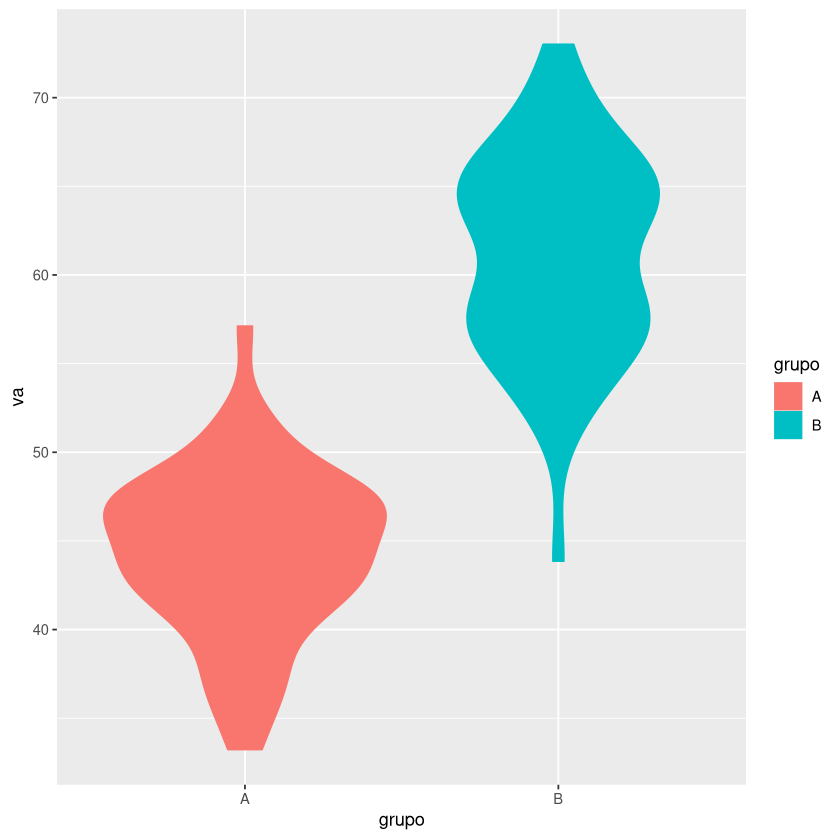

In [50]:
# histograma
p <- ggplot(
  datos,
  # color Y relleno según el grupo
  aes(
    x = grupo,
    y = va,
    color = grupo, fill = grupo
  )
) +
  # relleno blanco
 geom_violin()
p